# Análise de Assortatividade em Grafos de Ingredientes da Culinária Brasileira (U1T2)
---
Disciplina: Algoritmos e Estruturas de Dados II
</br>Discente: Felipe Gabriel B. da Silva

---
</br>
O presente projeto tem como objetivo analisar a assortatividade em um grafo de co-ocorrência de ingredientes em 50 receitas populares da culinária brasileira, bem como reforçar os conceitos sobre grafos aprendidos em sala de aula, utilizando a biblioteca NetworkX.
</br>
Outras bibliotecas importantes que também são utilizadas no projeto:

*   Matplotlib
*   Google.colab
*   Collections
*   Pandas
</br>

## Requisitos
1. Utilizar algum modelo de linguagem para gerar, a partir de uma imagem da receita, a listagem dos ingredientes utilizados, bem como classificar o ingrediente em uma das categorias abaixo:
  * Proteína, Carboidrato, Vegetal, Fruta, Laticínio, Gordura, Condimento ou Outro.
2. Organizar os dados em um arquivo .CSV em três colunas:
  * nome_receita, Ingredientes e tipos_ingredientes
3. Construir um grafo G, sendo:
  * Nós -> Ingredientes
  * Arestas -> Ingredientes que aparecem na mesma receita
  * Atributo dos nós -> Tipo do ingrediente
  * Cor do nó -> De acordo com o tipo do ingrediente
4. Analisar o coeficiente de assortatividade do tipo do ingrediente usando "networkx.attribute_assortativity_coefficient(G, 'tipo')"
## Análise da assortatividade

A assortatividade é uma medida de grafos que indicam o quanto os nós semelhantes tendem a se conectar entre si. No caso deste projeto, o quanto ingredientes do mesmo tipo se conectam.
</br>
Para a análise quantitativa, temos as seguintes classificações:

* O valor é próximo de 1? → Homofilia: ingredientes do mesmo tipo tendem a estar juntos.
* O valor é próximo de 0? → Combinação aleatória.
* O valor é negativo? → Heterofilia: há preferência por ingredientes de tipos diferentes.

Número de nós (ingredientes): 133

Número de arestas (coocorrências): 1195

Coeficiente de assortatividdade: -0.022807771993952845


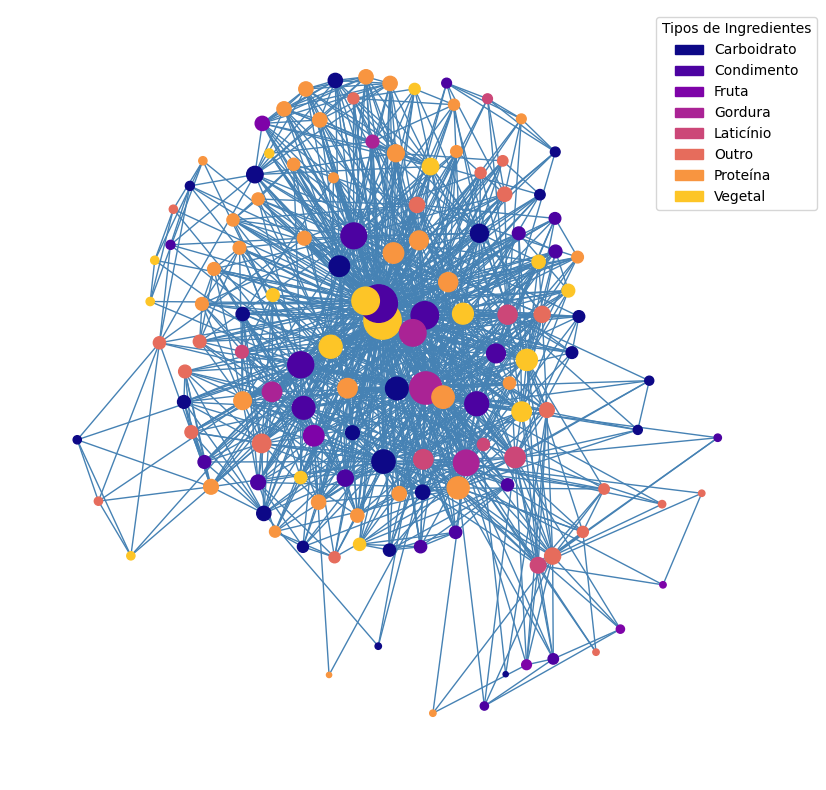

In [1]:
import networkx as nx
from google.colab import drive
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Setando o caminho do arquivo em .csv
arquivo = '/content/drive/MyDrive/2025.1/AED2/projeto_2/Ingredientes.csv'
# Lendo o arquivo com a bilioteca Pandas
dados = pd.read_csv(arquivo)
# Criando um dicionário do ingrediente e o tipo do ingrediente
dict_ingredientes = pd.Series(dados['tipos_ingredientes'].values, index=dados['ingredientes']).to_dict()
# Criando um grafo G
G = nx.Graph()

contagem_ingredientes = defaultdict(int)

# Laço para criar um grafo a partir do dataframe de um arquivo .csv
for _, row in dados.iterrows():
  tipo_str = row['tipos_ingredientes'] # Coluna do tipo de ingrediente
  ingredientes_str = row['ingredientes'] # Coluna do ingrediente
  # Pegando os dados que estão separados por vírgula
  lista_ing = [ingrediente.strip() for ingrediente in ingredientes_str.split(',')]
  lista_tipos = [tipo.strip() for tipo in tipo_str.split(',')]

  # adicionando os nós:
  for i, ingrediente in enumerate(lista_ing):
    tipo_ingrediente = lista_tipos[i]
    if ingrediente not in G.nodes():
      G.add_node(ingrediente, tipo=tipo_ingrediente)
    elif 'tipo' not in G.nodes[ingrediente]:
      G.nodes[ingrediente]['tipo'] = tipo_ingrediente

  # adicionando as arestas:
  for i in range(len(lista_ing)):
    for j in range(i + 1, len(lista_ing)):
      ingrediente1 = lista_ing[i]
      ingrediente2 = lista_ing[j]
      if G.has_edge(ingrediente1, ingrediente2):
        contagem_ingredientes[(ingrediente1, ingrediente2)] += 1
      else:
        G.add_edge(ingrediente1, ingrediente2, weight=1)
        contagem_ingredientes[(ingrediente1, ingrediente2)] = 1

# Tamanho do nó de acordo com o grau
tam_no = []
for node, degree in G.degree():
    tam_no.append(degree*7)

# mapeamento_cores
tipos_unicos = sorted(list(set(nx.get_node_attributes(G, 'tipo').values())))

# Setando o gradiente de cores
padrao_cores = plt.colormaps.get_cmap('plasma')

# Lista para guardar a cor de cada nó
cores = []

# Setando cada nó de acordo com o atributo do tipo
# Laço para percorrer todos os nós
for no in G.nodes():
    tipo_no = G.nodes[no].get('tipo', None) # Resgata o tipo do nó
    if tipo_no in tipos_unicos:
        # Pega o tipo daquele determinado nó
        # Compara com a lista de todos os tipos de nós
        # Normaliza e seta um index no gradiente das cores
        color_index = tipos_unicos.index(tipo_no) / len(tipos_unicos)
        color = padrao_cores(color_index)
    else:
        color = 'gray'
    cores.append(color)

print(f'Número de nós (ingredientes): {G.number_of_nodes()}')
print(f'\nNúmero de arestas (coocorrências): {G.number_of_edges()}')
print(f"\nCoeficiente de assortatividdade: {nx.attribute_assortativity_coefficient(G, 'tipo')}")


# Calcular layout
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 10))
# Criar uma legenda para as cores

legenda_patches = []
# Repete o processo feito para setar as cores pelo tipo
# Cria a legenda agrupando a cor e o tipo
for i, tipo in enumerate(tipos_unicos):
    color_index = i / len(tipos_unicos)
    color = padrao_cores(color_index)
    patch = mpatches.Patch(color=color, label=tipo)
    legenda_patches.append(patch)

# Adicionar a legenda no gráfico
plt.legend(handles=legenda_patches, title='Tipos de Ingredientes', bbox_to_anchor=(1.05, 1), loc='upper right')
# Desenha o grafo
nx.draw(G, pos, node_color=cores, node_size=tam_no, edge_color='SteelBlue')